In [10]:
#THIS FILE MAY ONLY BE RUN *ONCE* WHEN THE PATH "/data/all_images" EXISTS
'''
----------14 January 2024 | Aarya Bhave | Commited to Skin_Cancer_Diagnosis----------
Before running this file locally, you must have all 10,015 HAM10000 images in a directory with path '/data/all_images/.
This code carries out the sorting and reorganizing of all the image data in '/data/all_images/' folder.
This code WILL DELETE '/data/all_images/' after creating the '/data/reorganized/' folder to save space.
The '/data/reorganized/' folder will contain a proper sorted deep-copy of all the images from the original data pool.
This file must be run with '/Model_Construction/<MODEL>' as current working directory.
'''

#IMPORT LIBRARIES :
import pandas as pd 
import os
import shutil
import random
import matplotlib.pyplot as plt
import tqdm

In [11]:
#Sort the images into a flow_from_dir capable folder structure
#Create destination directory
os.mkdir('data/reorganized_train')
os.mkdir('data/reorganized_validation')
os.mkdir('data/reorganized_test')

#Data pool
data_dir = os.getcwd() + "/data/all_images/"

#Path to destination directories
train_dir = os.getcwd() + "/data/reorganized_train/"
test_dir = os.getcwd() + "/data/reorganized_test/"
validation_dir = os.getcwd() + "/data/reorganized_validation/"

In [12]:
#Load metadata
metadata_frame = pd.read_csv('data/HAM10000_metadata.csv')

#The dataset is skewed as follows:
print(metadata_frame['dx'].value_counts())

#Extract labels into a list
label = metadata_frame['dx'].unique().tolist()
label_images = []

#Keep counts
test_examples = train_examples = validation_examples = 0

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [14]:
#Copy all the images to subfolders
for i in tqdm.tqdm(label):
    os.mkdir(train_dir + str(i) + "/")
    os.mkdir(test_dir + str(i) + "/")
    os.mkdir(validation_dir + str(i) + "/")
    sample = metadata_frame[metadata_frame['dx'] == i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        random_num = random.uniform(0, 1)
        if(random_num<0.8):
            #Add to training set.
            shutil.copyfile((data_dir+"/"+id+".jpg"), (train_dir+i+"/"+id+".jpg"))
            train_examples+=1
            
        elif(random_num<0.9):
            #Add to crossvalidation set.
            shutil.copyfile((data_dir+"/"+id+".jpg"), (validation_dir+i+"/"+id+".jpg"))
            validation_examples+=1
            
        else:
            #Add to testing set.
            shutil.copyfile((data_dir+"/"+id+".jpg"), (test_dir+i+"/"+id+".jpg"))
            test_examples+=1
            
    label_images = []

100%|██████████| 7/7 [00:01<00:00,  3.87it/s]


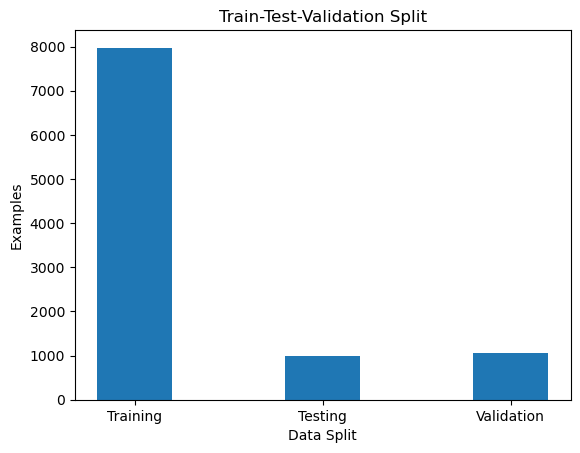

In [15]:
#Data visualization
graph_data = {'Training' : train_examples, 'Testing' : test_examples, 'Validation' : validation_examples}
plt.bar(list(graph_data.keys()), list(graph_data.values()), width=0.4)
plt.xlabel("Data Split")
plt.ylabel("Examples")
plt.title("Train-Test-Validation Split")
plt.show()

In [16]:
#Get rid of the original data pool to save space
shutil.rmtree('data/all_images')